In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import balance

Для синтетических данных что-то не получилось интересных результатов - все цены приблизительно равны затратам на первичные ресурсы. Значит подготовим тестов из реальных данных, а именно NIOT __(National Input-Output Tables)__.

Чисто нулевые строки и столбцы можно вычеркнуть за ненадобностью - их не производят и не потребляют. Вычеркнем их из теблицы для дальнейшего анализа.

In [7]:
tables = balance.read_NIOT('NIOTS/RUS_NIOT_nov16.xlsx')

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


/tmp/ipykernel_20371/2633109205.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(table), cmap='hot', interpolation='nearest')


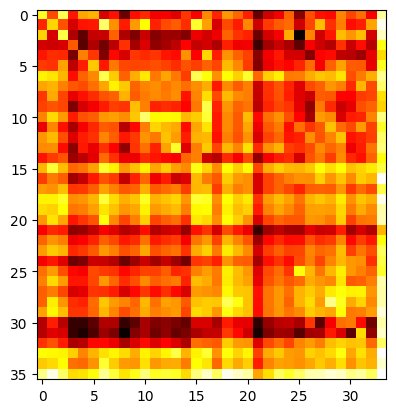

In [8]:
table = tables[14]
plt.imshow(np.log(table), cmap='hot', interpolation='nearest')
plt.show()

In [9]:
import jax.numpy as jnp
import jax

key = jax.random.PRNGKey(0)
rho = jax.random.uniform(key, (34,), minval=0.1, maxval = 10)
W, W0 = balance.get_W(table, rho)

In [10]:
p = jnp.zeros((36,))
p = p.at[33:].set([1,1,1])
for _ in range(100):
    p = p.at[:33].set(balance.CES(p, W, rho[:-1]))
p

Array([0.08017016, 0.11176262, 0.11818713, 0.00941634, 0.0080217 ,
       0.00993493, 0.15783183, 0.04096717, 0.00609489, 0.01509988,
       0.10954095, 0.01352544, 0.01418138, 0.0836677 , 0.00721815,
       0.13508861, 0.18176311, 0.00417684, 0.2165112 , 0.08215491,
       0.09857245, 0.00103732, 0.01372353, 0.0317524 , 0.01128035,
       0.01426789, 0.05211789, 0.07959298, 0.12307544, 0.11490823,
       0.0094088 , 0.06705137, 0.015438  , 1.        , 1.        ,
       1.        ], dtype=float32)

In [11]:
table_ = jnp.zeros((36,34))
table_ = table.at[:,:-1].set(balance.JCES(p, W, rho[:-1]))
table_ = table.at[:,-1].set(balance.JCES(p, W0, rho[-1]))

/tmp/ipykernel_20371/1057297367.py:2: RuntimeWarning: divide by zero encountered in log
  ax1.imshow(np.log(table), cmap='hot', interpolation='nearest')
/tmp/ipykernel_20371/1057297367.py:3: RuntimeWarning: divide by zero encountered in log
  ax2.imshow(np.log(table_), cmap='hot', interpolation='nearest')


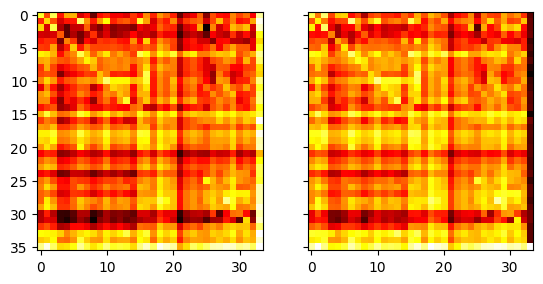

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(np.log(table), cmap='hot', interpolation='nearest')
ax2.imshow(np.log(table_), cmap='hot', interpolation='nearest')